# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [19]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | aasiaat
Processing Record 6 of Set 1 | cill airne
Processing Record 7 of Set 1 | kirakira
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | bikenibeu village
Processing Record 11 of Set 1 | kayangel
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | la'ie
Processing Record 14 of Set 1 | san antonio de pale
Processing Record 15 of Set 1 | axim
Processing Record 16 of Set 1 | nahrin
Processing Record 17 of Set 1 | erenhot
Processing Record 18 of Set 1 | escarcega
Processing Record 19 of Set 1 | enewetak
Processing Record 20 of Set 1 | utrik
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | stanley
Processing Record 23 of Set 1 | vil

Processing Record 39 of Set 4 | timbuktu
Processing Record 40 of Set 4 | san patricio
Processing Record 41 of Set 4 | tianshui
Processing Record 42 of Set 4 | ulladulla
Processing Record 43 of Set 4 | santa isabel
Processing Record 44 of Set 4 | luganville
Processing Record 45 of Set 4 | port pirie
Processing Record 46 of Set 4 | nafada
Processing Record 47 of Set 4 | kristiansund
Processing Record 48 of Set 4 | dawei
Processing Record 49 of Set 4 | tolanaro
Processing Record 0 of Set 5 | lorengau
Processing Record 1 of Set 5 | devinuwara
City not found. Skipping...
Processing Record 2 of Set 5 | praia da vitoria
Processing Record 3 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 4 of Set 5 | margaret river
Processing Record 5 of Set 5 | saint-philippe
Processing Record 6 of Set 5 | idfu
Processing Record 7 of Set 5 | coreau
Processing Record 8 of Set 5 | rio grande
Processing Record 9 of Set 5 | svislach
Processing Record 10 of Set 5 | kenora
Processing Reco

Processing Record 31 of Set 8 | ta`u
Processing Record 32 of Set 8 | camayenne
Processing Record 33 of Set 8 | alice town
Processing Record 34 of Set 8 | obo
Processing Record 35 of Set 8 | gadzhiyevo
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | yaren
Processing Record 38 of Set 8 | yauya
Processing Record 39 of Set 8 | gisborne
Processing Record 40 of Set 8 | tura
Processing Record 41 of Set 8 | grand baie
Processing Record 42 of Set 8 | whistler
Processing Record 43 of Set 8 | itamaraca
Processing Record 44 of Set 8 | argo
Processing Record 45 of Set 8 | ngetkib
Processing Record 46 of Set 8 | ntossoni
City not found. Skipping...
Processing Record 47 of Set 8 | cariamanga
Processing Record 48 of Set 8 | rikaze
Processing Record 49 of Set 8 | kokoda
Processing Record 0 of Set 9 | namtsy
Processing Record 1 of Set 9 | kalemie
Processing Record 2 of Set 9 | labrador city
Processing Record 3 of Set 9 | pyu
Processing Record 4 of Set 9 | mwene-ditu
Processing

Processing Record 22 of Set 12 | sola
Processing Record 23 of Set 12 | kulhudhuffushi
Processing Record 24 of Set 12 | jorpeland
Processing Record 25 of Set 12 | minas de marcona
Processing Record 26 of Set 12 | ocos
Processing Record 27 of Set 12 | mahalapye
Processing Record 28 of Set 12 | isangel
Processing Record 29 of Set 12 | tibu
Processing Record 30 of Set 12 | brookings
Processing Record 31 of Set 12 | sokcho
Processing Record 32 of Set 12 | north side
Processing Record 33 of Set 12 | horishni plavni
Processing Record 34 of Set 12 | bodo
Processing Record 35 of Set 12 | al-`ula
City not found. Skipping...
Processing Record 36 of Set 12 | ocean pointe
City not found. Skipping...
Processing Record 37 of Set 12 | richland center
Processing Record 38 of Set 12 | micheweni
Processing Record 39 of Set 12 | cannes
-----------------------------
Data Retrieval Complete      
-----------------------------


In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-3.15,73,100,0.00,CA,1713929412
1,port-aux-francais,-49.3500,70.2167,4.32,66,53,14.40,TF,1713929286
2,bethel,41.3712,-73.4140,9.47,63,0,2.68,US,1713929470
3,tiksi,71.6872,128.8694,-10.00,80,98,3.75,RU,1713929295
4,aasiaat,68.7098,-52.8699,-4.43,99,86,3.00,GL,1713929471


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-3.15,73,100,0.00,CA,1713929412
1,port-aux-francais,-49.3500,70.2167,4.32,66,53,14.40,TF,1713929286
2,bethel,41.3712,-73.4140,9.47,63,0,2.68,US,1713929470
3,tiksi,71.6872,128.8694,-10.00,80,98,3.75,RU,1713929295
4,aasiaat,68.7098,-52.8699,-4.43,99,86,3.00,GL,1713929471


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

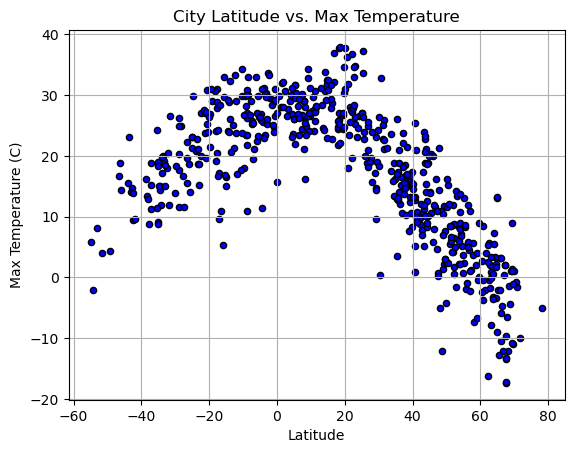

In [32]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot('Lat', 'Max Temp', 
                  color='blue', edgecolor='black',kind = 'scatter')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

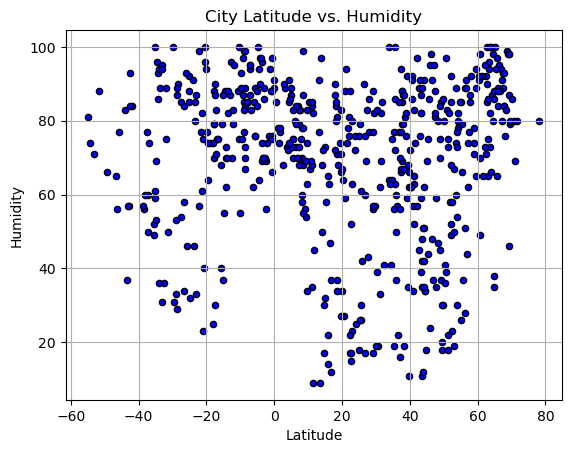

In [34]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot('Lat', 'Humidity', 
                  color='blue', edgecolor='black',kind = 'scatter')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

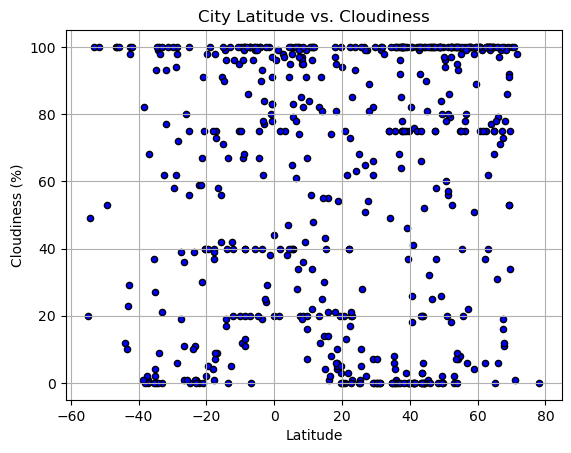

In [36]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot('Lat', 'Cloudiness', 
                  color='blue', edgecolor='black',kind = 'scatter')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

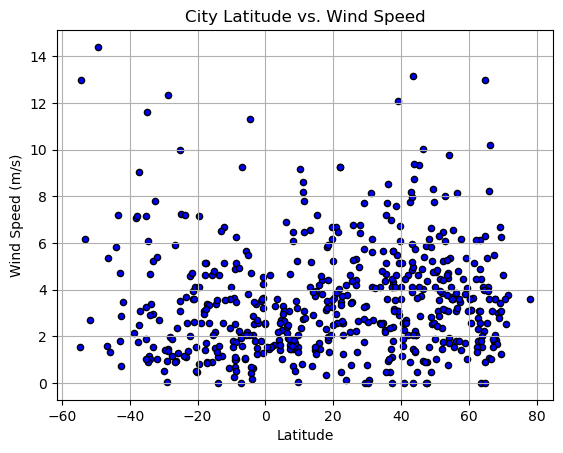

In [38]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot('Lat', 'Wind Speed', 
                  color='blue', edgecolor='black',kind = 'scatter')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

def linear_regression(df, x_column, y_column):
    # Extract x and y data from the DataFrame
    x = df[x_column]
    y = df[y_column]
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Calculate R-squared value
    r_squared = r_value ** 2
    
    # Calculate equation of the line
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # Plot the data points
    plt.scatter(x, y, label='Data Points')
    
    # Plot the regression line
    plt.plot(x, slope * x + intercept, color='red', label='Regression Line')
    
    # Annotate the equation of the line and R-squared value on the plot
    annotation = f'{equation}\nR-squared = {r_squared:.2f}'
    plt.text(x.max(), y.min(), annotation, fontsize=16, color='red')
    
    # Add labels and legend
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title('Linear Regression')
    
    # Show plot
    plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-3.15,73,100,0.00,CA,1713929412
2,bethel,41.3712,-73.4140,9.47,63,0,2.68,US,1713929470
3,tiksi,71.6872,128.8694,-10.00,80,98,3.75,RU,1713929295
4,aasiaat,68.7098,-52.8699,-4.43,99,86,3.00,GL,1713929471
5,cill airne,52.0500,-9.5167,8.64,92,100,1.46,IE,1713929471


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,4.32,66,53,14.40,TF,1713929286
6,kirakira,-10.4544,161.9205,29.87,75,95,2.36,SB,1713929471
13,san antonio de pale,-1.4014,5.6325,28.43,76,100,3.52,GQ,1713928696
20,puerto ayora,-0.7393,-90.3518,24.75,97,83,3.20,EC,1713929474
22,vilhena,-12.7406,-60.1458,21.33,96,5,1.16,BR,1713929475


###  Temperature vs. Latitude Linear Regression Plot

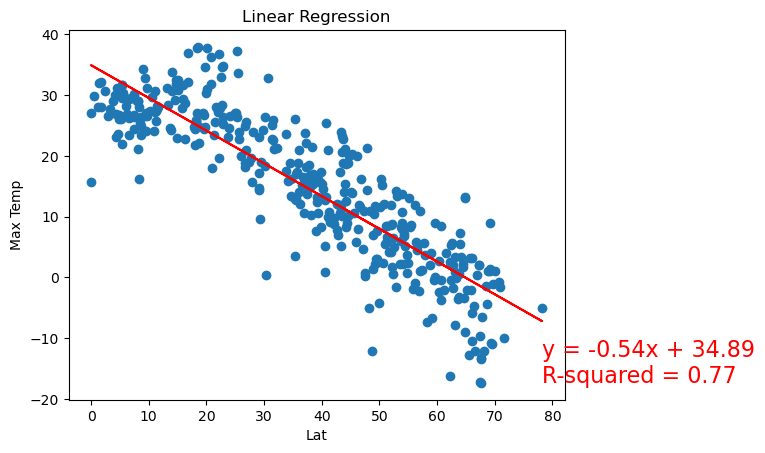

In [62]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df, 'Lat', 'Max Temp')


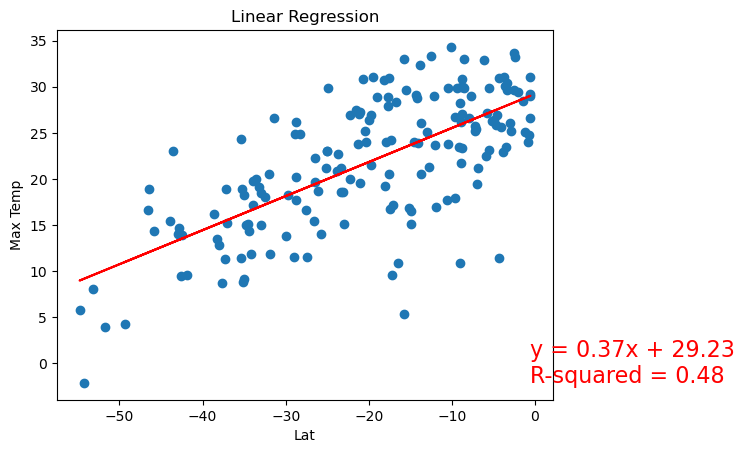

In [63]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df, 'Lat', 'Max Temp')


**Discussion about the linear relationship:** The closer to the equator, the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

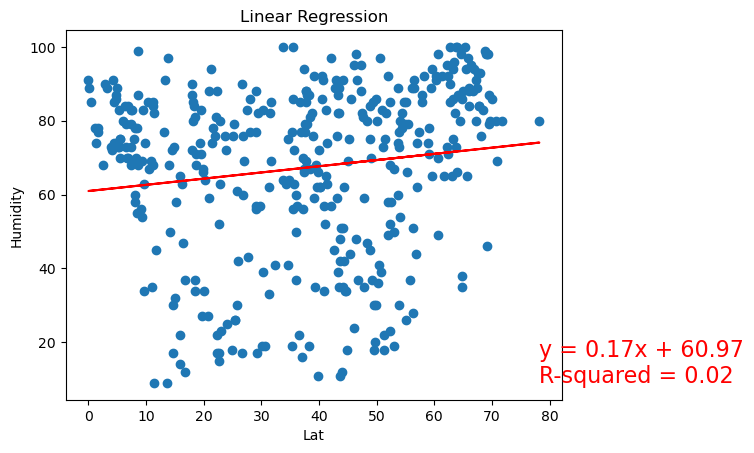

In [64]:
# Northern Hemisphere
linear_regression(northern_hemi_df, 'Lat', 'Humidity')


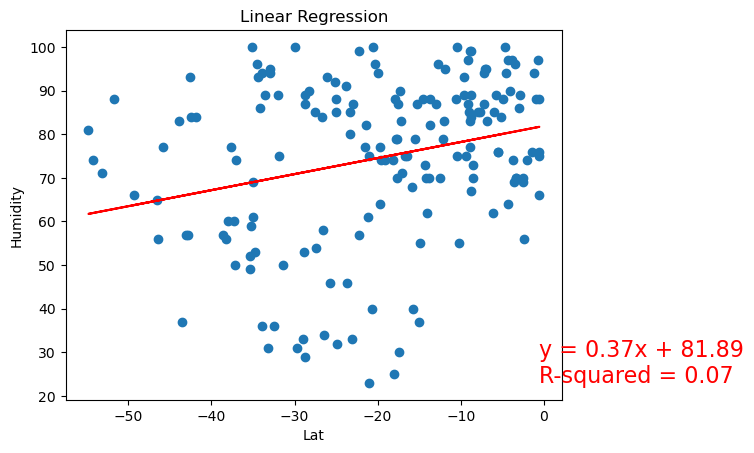

In [66]:
# Southern Hemisphere
linear_regression(southern_hemi_df, 'Lat', 'Humidity')


**Discussion about the linear relationship:** Humidity increases at latitude increases

### Cloudiness vs. Latitude Linear Regression Plot

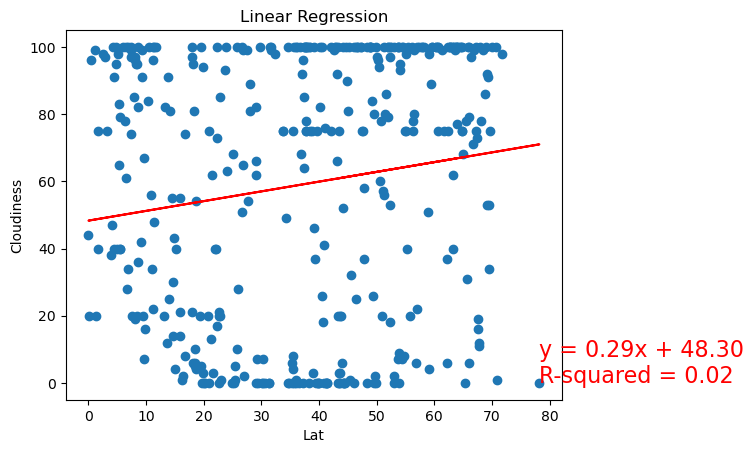

In [67]:
# Northern Hemisphere
linear_regression(northern_hemi_df, 'Lat', 'Cloudiness')


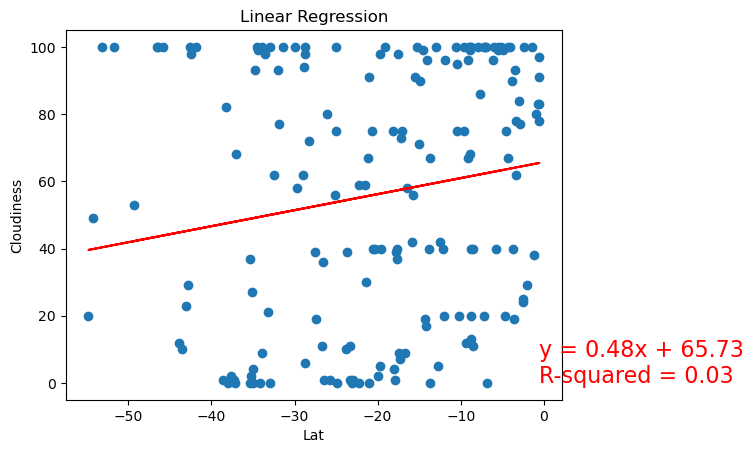

In [68]:
# Southern Hemisphere
linear_regression(southern_hemi_df, 'Lat', 'Cloudiness')


**Discussion about the linear relationship:** The latitude has no effect on the cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

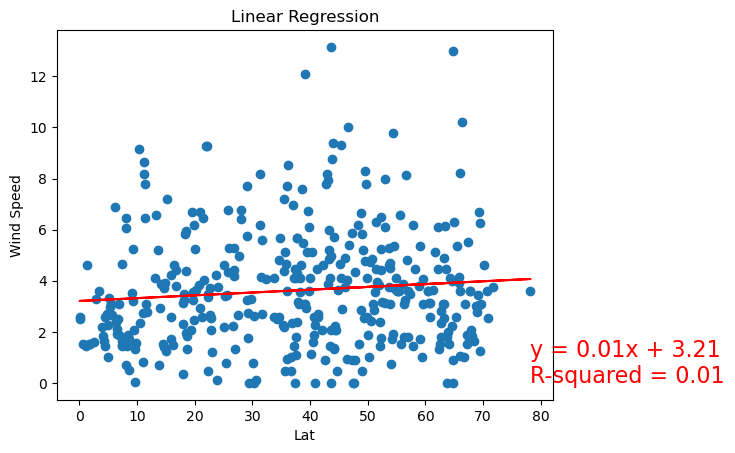

In [70]:
# Northern Hemisphere
linear_regression(northern_hemi_df, 'Lat', 'Wind Speed')


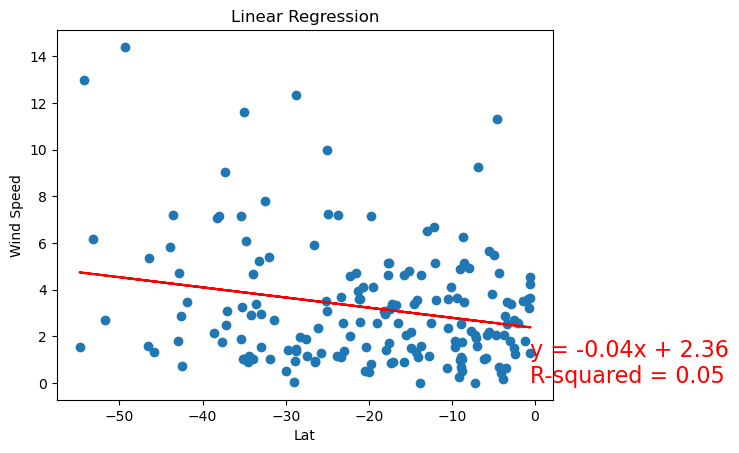

In [71]:
# Southern Hemisphere
linear_regression(southern_hemi_df, 'Lat', 'Wind Speed')


**Discussion about the linear relationship:** Latitude has no effect on wind speed. 